# PS 88 - Lecture Notebook 3 - Preferences, Utility, Expected Utility, and Voting

When we are studying human behavior, as we typically are in political science, we are ultimately interested in the choices made by people (or groups of people, like countries). In doing so, we should take the intentions seriously, and try to understand why they make the choices they do in this light. We wanted to know why people vote the way they do or why they choose to own guns. We want to know why the legislative bodies countries pass certain kinds of laws and not others, and why some countries pursue more aggressive foreign policy. 

Implicit here is the idea that individuals, and maybe groups, have **preferences** over different possible outcomes, and act to try and fulfill those preferences. 

Our first goal this week will be developing the notion of preferences and utilities in a simple mathematical framework. 

If we want to know why people make the choices they do, we need to know something about their goals and values. Several factors make it hard for us to pursue our goals, and also make it hard to infer what goals individuals have based on their behavior. Both boil down to a common factor, which is that many things are out of our control. We typically don’t just have direct preferences over who we vote for, we have preferences over who wins the election or what policies they choose when elect. Military leaders don’t have preferences over whether to withdraw troops or escalate a conflict when things are going well; they have preferences over winning conflicts and the cost it might take to do so (if it is possible at all).


A useful way to think about this is that whether we are happy with the choices we make depends on two things outside of our control. First, the choices of others; how they vote, or how our military adversaries respond to an escalation. And second, they may just depend on random chance: does it rain on the day we scheduled a major protest, does a missile go where it is intended or miss (or accidentally hit something it shouldn’t!), or did a bureaucrat wake up on the wrong side of the bed before we bring a complaint to her desk.


At first, we are going to ignore these complications and study a world where a decision-maker gets to make choices in isolation, without having to worry about other people or randomness. Next we will bring back randomness, and in the next couple weeks we will consider the thornier problem of other people. 


## Preferences and Voting

Regardless of whether we are thinking about randomness and other people or not, here is where we are going. What we would like to do is assign numbers or variables to outcomes, which reflect how much our decision-maker likes them. We call these numbers the utility associated with an outcome, where higher utility means liking it better. 

One of our main running examples will be a citizen who is deciding whether to vote for their favored candidate or abstain (stay home) in an election. To simplify, consider four possible outcomes. I'm going to assign a "utility" number to each.
- Vote and favored candidate wins: 1
- Vote and favored candidate loses: -1
- Abstain and favored candidate wins: 2
- Abstain and favored candidate loses: 0

This gives four possibilities: and we give utility numbers to each. Higher numbers mean better outcomes, and so what these particular numbers tell us is that the best outcome is abstaining/favored candidate winning, followed by voting/favored candidate winning, followed by the two outcomes where the favored candidate losing (with abstention better among those two). 

It might be helpful to keep this information in a table:

In [47]:
# Libraries we will use in the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import Table
from ipywidgets import interact
%matplotlib inline

In [48]:
# Making a table where each row is a choice, 
# With a column labeling that choice and two columns indicating the utility depending on the outcome
votepref = Table().with_columns("Choice", ["Vote", "Abstain"], "Uwin", [1,2], "Uloss",[-1,0])
votepref

Choice,Uwin,Uloss
Vote,1,-1
Abstain,2,0


Three ideas are captured by these preferences. First, that the voter generally prefers abstention to voting (they are busy, and voting takes time!). Second, they want their favored candidate to win. Third, there is a sense in which the favored candidate winning matters more, as this is what leads to the best two outcomes. Another way to see this is that keeping the vote choice fixed, the favored candidate winning increases the utility by 2 (compare 1 to -1 and 2 to 0), and keeping the winner fixed abstaining increases the utility by 1.


What we will typically do with these utility numbers is assume that people make choices which maximize their utility, often in combination with some other assumptions. For example, if the voter just gets to decide whether they vote or abstain, we will need to make an assumption about how this choice affects who wins the election. 

Let's start with a simple case and assume that the preferred candidate will win no matter what. (Much more on this later!) If so, the choice boils down to voting and getting 1 or abstaining and getting 2, so if maximizing utility the voter will stay home. Similarly, if we assume the preferred candidate will lose no matter what the utility for abstaining is still higher (0 vs -1).

We can see this in the table because abstaining gives a higher utility for both columns.


A way that we can be more general and also make contrasts like this more clear is to assign variables to different outcomes, or components of an outcome. Let’s write the utilities like this:
- Vote and favored candidate wins: $b-c$
- Vote and favored candidate loses: $-c$
- Abstain and favored candidate wins: $b$
- Abstain and favored candidate loses: $0$

The outcomes associated with the favored candidate winning include a $b$ and those where the citizen votes are given a $-c$. This captures the idea that the value of the favored candidate winning is $b$ and the cost of voting is $c$. If we assume $c > 0$, then voting is costly (keeping fixed the winner you would rather abstain), and $b> c$ means that the citizen cares more about the preferred candidate winning than about whether they vote or not.

The previous version set $b=2$ and $c=1$. To check this, we can define these as variable and then remake the table:

In [8]:
b=2
c=1
votepref = Table().with_columns("Choice", ["Vote", "Abstain"], "Uwin", [b-c,b], "Uloss",[-c,0])
votepref

Choice,Uwin,Uloss
Vote,1,-1
Abstain,2,0


The same idea holds in our more general variable formulation. If voting gives $b-c$ and abstaining gives $b$, and we have assumed $c > 0$, then the utility maximizing choice is to abstain if we know the preferred candidate will either win for sure.

You can do a similar check for the case where the voter knows their preferred candidate will lose.

These may seem like strong assumptions, even setting aside the ones about when the preferred candidate will win. Do we really think that people assign numbers or variables to how much they like different outcomes? And, in more complicated settings, do we think they are able to easily identify the choice that will lead to the maximizing utility number?



This can start to feel like a characterization of people as selfish maximizing robots. I'm going to argue that this characterization is incorrect, and that by using utility functions in this way we aren’t making super strong assumptions about how people make decisions. 


## Preferences in general

Let’s think a bit more generally about what it means to have preferences over choices or outcomes. And at first we’ll be thinking about choices and outcomes interchangeably, that is, setting aside the fact that what other people do might influence what is optimal for our decision-maker (DM). Think we are in a setting where someone is deciding what to have for lunch, or what class to take to finalize their schedule. 


We will say that having well-defined preferences requires two things. The first we call completeness, or comparability. This states that when thinking about any two options a and b, the DM can always answer yes or no to questions of the form “is a at least as good as b”, and  at least one of the following is true: a is at least as a good as b, or b is at least as good as a.


The answer to both questions may be “yes”, which implies that both are equally good. We will call this situation indifference between a and b. And one can be true but not the other: for example, if a is at least as good as b and b is not at least as good as a, we will say that a is strictly preferred to b. The only thing that this notion of preferences does not allow is saying that neither is true, which we can loosely think of as saying “a and b aren’t comparable”.


Here is another way to think about this. If we ask “is a at least as good as b” and “is be at least as good as a”, there are four possible answers to this pair of questions, summarized here:

|               | b P a                                                              | not b P a                                                   |
|---------------|-----------------------------------------------------------------------------------|-------------------------------------------------------------------|
| a P b     | Indifferent  | a strictly better     |
| not a P b | b strictly better | not comparable              |

In the top left, the answer to both is “yes”
which we called the indifference case. In the top right we get the case where a is strictly better than b, and in the bottom left b is strictly better than a. The bottom right is the corner that we don’t allow. 



Our second assumption is called “transitivity”, which ensures there is a natural order to preferences. This states that if a is at least as good as b and b is at least as good as c, then a is at least as good as c. This also implies a similar property for indifferent and strict preference: e.g., if a and b are equally good, and b and c are equally good, then a and c are equally good. 

To see why this assumption is important, think about what might happen if it isn’t true. If a is better than b, b is better than c, but c is better than a, then there is no real ordering to which is liked best. You can also read more about some paradoxes that this generates in my lecture notes.




## Utility Shelves

Hopefully these seem like pretty reasonable and minimal requirements for what it means to have preferences. And they lead to two very important and useful results for any decision problem with a finite number of choices.

- First, there is at least one “best” choice, which is at least as good as all of the others. We call this the “rationalizable” choice. 
- Second, we can represent the preferences of the decision-maker with a utility function that assigns higher numbers to choices they like better. 



To unpack these a bit, let’s go through a visual version of the argument.

Suppose a citizen is voting in a parliamentary election with four parties. Our citizen has preferences over these parties, in the sense that all pairs are comparable and these comparisons are transitive. We are going to represent these preferences by building what I call “utility shelves”. 

Let's start by comparing the Labor party (L) and the Conservative party (C). If the voter has preferences meeting our assumptions, then one of three things is true, which will correspond to different shelving choices:
- If Labor is strictly better than the Conservatives, the L goes on a higher shelf. 
- If the Conservatives are strictly better than Labor, then C goes on a higher shelf. 
- If the two parties are equally good (indifference), they go on the same shelf. 

Let’s say this citizen thinks the Conservatives are strictly better than Labor, and so build two shelves with C on the higher one.

| C |
|---|
| L |


Now let’s bring in the Green party G, and first compare it to the Conservatives. Visually, we could place G higher than C, on the same shelf, or on a lower shelf. And when we compare the Greens to Labor, the G can again go above, on the same shelf, or below. Combining, there are really 5 options now: The Greens could go on the same shelf as C, same as L, above both, below both, or in-between. For illustration, let’s say it goes on the same shelf as Labor.

| C | G |
|---|---|
| L |   |


This is a good point to remind ourselves of what transitivity implies. Transitivity says that once the Conervatives are is on a higher shelf than Labor, we can’t say that the Green party goes higher than the Conservatives but lower than Labor. Physically it should be clear that this is impossible, because the property of being on a higher shelf is transitive. Essentially we are assuming that preferences have the same property. 



Finally, consider the Nationalists. Again there are five options; they can go on an existing shelf, or a new one above/below/inbetween the existing two. Let’s say the Nationalists are the worst, and goes at the bottom.

| C | G |
|---|---|
| L |   |
| N |   |

We now have a visual representation of the preferences. If we want to know whether one choice is better than another, we can just ask “is it on a higher shelf”? And there will always be at leats one choice on the "top shelf", which is at least as good as all other choices. We will call a rationalizable choice. As this example shows, there may be more than one rationalizable choice if there is indifference on the top shelf.


The step to utility functions is now an easy one. All we have to do is assign a number to each shelf, with higher numbers going to higher shelves. If we call the shelf number the utility, then we are assigning a higher utility to party that the citizen likes better. Here is one way to do that:


| 2 | C | G |
|---|---|---|
| 1 | L |   |
| 0 | N |   |

The top shelf will the highest utility, and remember whatever is on the top shelf is a rationalizable choice. So, saying that people have utility functions and maximize this utility is just a convenient way to capture the assumption that they have coherent preferences, and choose something which is at least as good if not better than all of the other choices. Which shouldn’t be too objectionable.


The reason this is so convenient is that we no longer need to think through all the possible comparisons, which can get pretty unwieldy when there are a lot of choices. If we come up with a way to assign a single number to all of the choices, then we immediately have a ranking of the choices, and know what comes out on top.

Another nice aspect of this argument is that it doesn’t really matter what numbers we put on utility shelves as long as higher numbers go on higher shelves. So if you thought that it seems a little arbitrary that we said the utility associated with voting and having the preferred candidate win is 1, you are right! But that’s ok, because all we really care about is the ordering of the utility values, not the absolute numbers.

However, there is a big caveat to that point once we enter the world where our decision-maker no longer gets to directly pick the outcome which they experience. Let’s start thinking about incorporating uncertainty like this. 


## Choice with Uncertainty


Here is a series of related examples. In all of them, you get to choose whether to take a bet with me. If you don’t take the bet, nothing happens. If you take the bet, we will flip a coin. There are three possible outcomes here: no bet, bet and heads, bet and tails. But you don’t have full control over the outcome: if you take the bet, you get one of the latter two outcomes with equal probability. 

In the first version, if the coin is heads you pay me two dollars, and if it is heads I pay you one dollar. Would you take this bet?

In the second, if it is heads you pay me a dollar, and if it is tails I pay you a dollar. Would you take this?

In the third, heads means you pay me a dollar, and tails means I pay you two dollars. Would you take this?

In the final version, if it’s heads you pay me a dollar, and if tails, I pay you 50. Would you take this?


To make sense of when a rational person would take these bets, we need to do two things. First, we need to translate these changes in how much money we have into a utility function. A simple way to do this is to define your utility as “change in money”. So no bet gets a utility of $0$ in each example. In the first example, $U(H) = -2$ and $U(T) = 1$. Of course you could have a different utility function; maybe you care more about gains than losses, etc. We will revisit this later, but for now take the utility function as a given.

The next thing we need to do is make sense of the fact that different outcomes might happen. We do this with the notion of probability. Probability is a huge and fascinating subject, but here we just need the core basics. The easiest way to think about probabilities are is how frequently an event happens. So with a coin flip, since heads comes up half of the time can say the probability of H is 50%, or we often write this as probability $0.5$ (recall “per cent” means “per 100”, so $50%$ is $50/100 = 0.5$.). Similarly, the probability of tails is $0.5$ as well.

Two important properties of these probabilities are that (1) they are both numbers between 0 and 1 (or percentages between 0 and 100), and (2) the sum of the probabilities is 1 (100 percent). These are in fact the two key properties of any probability distribution. There can be more than two options, say, rolling a die has 6 possibilities each with probability $1/6$, so again summing to 1. And probabilities need not be the same for each event. There may be a $0.7$ probability of your favored candidate winning an election, and then there must be a $0.3$ probability that they do not win. 

Once we know the probabilities of the possible outcomes, and have a utility over the outcomes, a natural thing to ask is “what will be the average utility if I take the bet?” We call this the expected utility.

In the coin flip example, this is pretty easy. What we need to do is compute the average change in money if you take the bet. In the first version, half of the time you lose 2 dollars (-2) and half of the time you win 1. So the average change is $0.5 \times (-2) + 0.5 \times (1)$:

In [49]:
.5*(-2) + .5 * (1)

-0.5

On average, you would lose half a dollar, or 50 cents. 

If you take  no bet choice, your money change is zero. So this bet gives a lower expected utility than the utility of no bet. Someone who aims to maximize expected utility should not take this bet.

How about the last example, where you lose a dollar if the coin comes up heads and gain 50 if it comes up tails? Now we compute 

In [50]:
.5*(-1) + .5*50

24.5

This is a fair amount more than zero. We can compute the expect utility for all by setting up the following table:


In [51]:
bets = Table().with_columns("Bet", [1,2,3,4], "U(H)", [-2,-1,-1,-1], "U(T)", [1,1,2,50])
bets

Bet,U(H),U(T)
1,-2,1
2,-1,1
3,-1,2
4,-1,50


Each row corresponds to a bet. We can compute the expected utility as:


In [52]:
EUs = bets.column("U(H)")*.5 + bets.column("U(T)")*.5 
bets = bets.with_column("EU", EUs)
bets

Bet,U(H),U(T),EU
1,-2,1,-0.5
2,-1,1,0
3,-1,2,0.5
4,-1,50,24.5



If our DM with these preferences maximizes her expected utility, then she should never take the first bet, be indifferent between the bet in the second case, and always accept in the third and fourth. Setting aside the case of indifference (where our theory does not make a prediction either way), it certainly predicts no one should take the first and everyone should take the 3rd and 4th. If we survey a bunch of people, this will usually be a reasonable approximation of the truth, if not exact. Why isn’t it perfect?

A major reason is that people’s utilities probably are not just equal to how much money they have. In particular, even if we like more money, assuming our utility is exactly equal to changes in how much we posses isn’t necessarily true. You might have what economists call diminishing marginal utility to money, meaning going from a gain of 0 to 1 dollar may not be the same as going from 49 to 50 dollars.  You may also particularly like losing money relative to the status quo, as one of the famous challenges to EU theory called prospect theory argues. You may also inherently enjoy taking gambles, or inherently dislike taking gambles, (or this could depend on the context). People also may just be confused by questions like this.

We could do a whole semester on these kinds of questions but if I can summarize very quickly: there are some well-documented deviations from the predictions of theories based on maximizing EU. But as with this example, behavior tends to be reasonably close to what maximizing EU would predict. So if we have to make a simplifying assumption (as we do when theorizing), it’s not a bad place to start. 

## Political Choice with Uncertainty


Let’s think of a more political example. Suppose you can either stay home or join a protest. Let’s say your utility to staying home is zero. If you protest, either you get arrested, giving utlity $-2$, or don’t get arrested, giving utility $1$. 

If the chance of getting arrested is $1/2$, this is exactly the same as the first coin flip problem: the utility to stay home (no bet) is $0$, and the expected utility to protest is:


In [53]:
.5*(-2) + .5*1

-0.5

But what if the probability of getting arrested is not $1/2$? Let’s be more general and say this happens with probability p, where  $0 \leq p \leq 1$. A natural extension to the equal probability case is to think of the expected utility as a weighted average, where we put more weight on things that are more likely to happen. Here, we put weight p on the arrest utility and (1-p) on the no arrest utility. So the expected utility to protest is now $p(-2) + (1-p)(1) = 1-3p.$ If $p$ is low (arrest is unlikely) this will give positive expected utility:

In [54]:
p=.1
1-3*p

0.7

If $p$ is high (arrest is likely) it will give negative expected utility 

In [55]:
p=.8
1-3*p

-1.4000000000000004

Some simple algebra gives that the utility to protest is greater than 0 if $p < 1/3$. We can also see this visually using the plotting capabilities in Python.

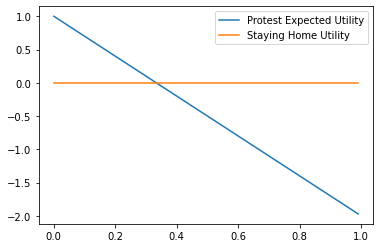

In [56]:
# Setting outcome utilities
u_arrest=-2
u_not=1
u_home=0
# Setting a range of p to plot
p = np.arange(0,1, step=.01)
# Plotting the expected utility to protest as a function of p
plt.plot(p,p*u_arrest + (1-p)*u_not, label='Protest Expected Utility')
# Plotting the expected utility to staying home as a function of p
# Since this does not depend on p, it will be a flat line
plt.plot(p,p*u_home, label="Staying Home Utility")
# Adding a legend
plt.legend()

The blue line (EU for protest) is higher than the orange line (EU for staying home) when $p$ is small, in particular less than $1/3$. 

Here is a general formula for the expected utility for making a choice that leads to two outcomes. Call the outcomes 1 and 2, with utilities $u_1$ and $u_2$. Call the probability that outcome 1 happens $p$, and to make them sum to 1 the other probability must be $1-p$. Then the expected utility is $p u_1 + (1-p) u_2$.

If comfortable with sum notation, it's easy to go to one more level of generality, to compute the expected utility for a choice A which could lead to any finite number of outcomes. Suppose there are $n$ possible outcomes, with utilities $u_1,...u_n$. And let the probabilities be $p_1,...p_n$, where this must be a proper probabilities distribution (all are positive, and they sum to 1). Then the expected utility is:
$$
EU = \sum_{i=1}^n u_i p_i
$$


## Rational voting, redux

Now let’s return to our opening example where a citizen decides whether to show up to vote or abstain. Let’s use the variable utilities where $b$ is the value of the preferred candidate, and $c$ is the cost of voting. 

We showed before that if the voter knew for sure that her favored candidate would win or lose, then it is not rationalizable to turnout, since this just incurs a cost $c$ with no benefit. However, what if her decision to vote or not affects the probability of winning?

This is a question addressed in some classic political science papers. We can get at the core idea pretty quickly. 

Suppose that if the voter turns out, her preferred candidate wins with probability $q_v$. Then the expected utility to vote is $q_v b - c$.


If abstaining, the preferred candidate wins with probability $q_a$, and the expected utility is $q_a b$.

When does voting give a higher expected utility? Whenever $q_v b - c \geq q_a b$. We can rearrange it to be:

$$p b > c$$

Where $p = q_v - q_a$ is the change in the probability of your preferred candidate winning if you vote, and $b$ and $c$ still represent the benefit to the preferred candidate winning and the cost of voting. 

If we want to see if this is a good theory for predicting when people vote, lets think about some realistic values for these variables.

What is the cost of voting? This depends on what kind of election, where you live, and the electoral laws in your area. If it’s an election with one office and you can vote by mail, it probably just takes 5-10 minutes of your time. For longer elections or if you have to travel to a voting booth and/or wait in line for a while, it could be quite a bit more. As an approximation, let’s assume it as about 30 minutes of your time. 


What is the benefit of your preferred candidate winning? Of course this also varies by election, in terms of whether the office in question will set policies that affect your life (and the lives of others; you can care about that too!), and the difference in the two candidates. So for now let’s not put a particular value on this, and later we will ask “how big does $b$ have to be to make voting worth it?”

How about the probability that your vote changes the outcome? Again, this will vary by election. If you are on a small committee with just a handful of others, this may be reasonably high. In a bigger electorate, it is probably much more rare. Exactly how rare is a question we will explore in detail in the lab.



Here is one estimate of the probability that an individual vote would matter in the 2008 presidential election, by state (see <a href="http://www.stat.columbia.edu/~gelman/research/published/probdecisive2.pdf">here</a> for the full paper). We won’t delve into all the details here, in part because the particularities can get quite technical, and in part because we will see a simplified version in the lab. But here is their estimate by state:

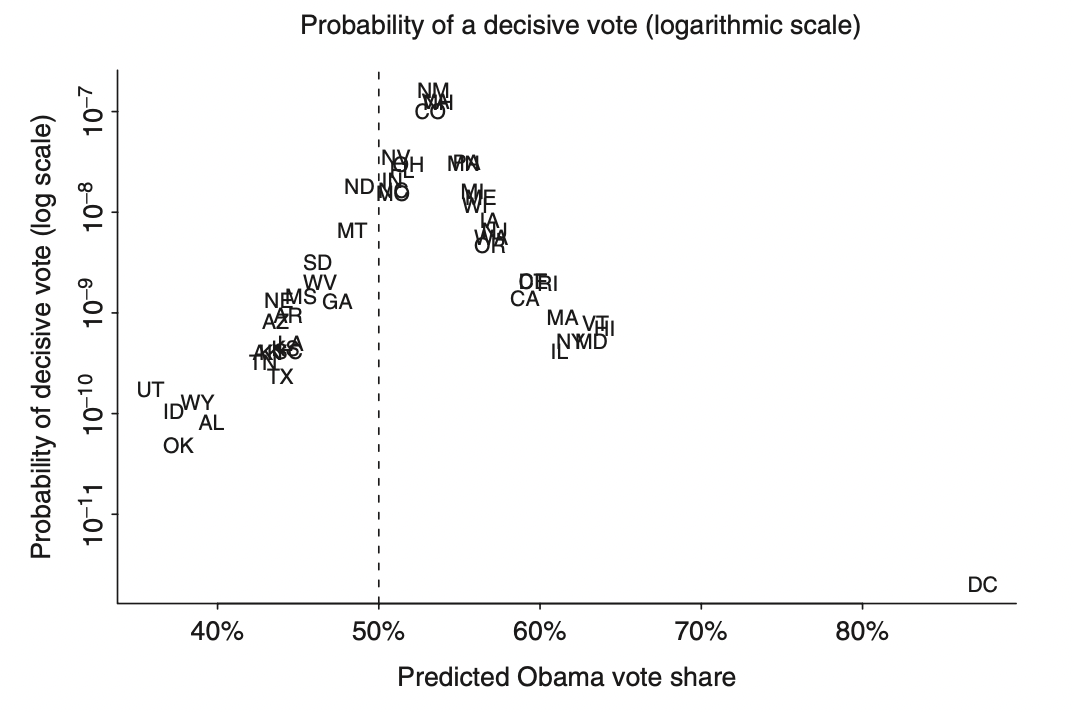


A first key takeaway here is that the probabilities are very low. The highest states are around $10^{-7}$, which is around 1 in 10 million. The second key takeaway is that these probabilites are even lower in states that are reliably Republican or Democratic, and hence have a higher and lower predicted Obama vote share. 

Let’s think about whether it is worth it for someone to vote in a US presidential election if it takes 30 minutes of their time and they have a 1 in 10 million chance of swaying the outcome. Since we are specifying the $p$ and $c$ terms, let's rewrite our equation to:
$$
b \geq c/p
$$
The ratio $c/p$ (in minutes) is:


In [57]:
c=30
p=10**(-7)
c/p

300000000.0

That's a lot of minutes, so let's convert it into years:

In [58]:
# 60 minutes per hour, 24 hours per day, 365 days per year
(c/p)*(1/60)*(1/24)*(1/365)

570.7762557077625

So getting my preferred candidate to win would have to be worth 571 years of my time in order to justify spending 30 minutes voting. 

In other words, if someone campaigned on a platform of “life imprisonment for PS 88 instructors”, and it took me 30 minutes to vote, it would not be worth it for me to do so.



## Is the model too simple?


A problem with this analysis is that the majority of eligible adults in most democracies do vote. Is that because voters are bad at doing expected utility calculations?

Maybe, but I think a more realistic possibility is that we haven’t properly captured their preferences. Like we discussed last week, we might have oversimplified how people think about this choice: maybe people care about more than just the probability they swing the outcome of the election.


One prominent explanation from <a href="https://www.jstor.org/stable/1953324">Riker and Ordeshook</a> is that people may also feel a duty to vote. Suppose they get an additional bump to their utility of $d > 0$ if voting. It’s quick to see that this leads to a modified version of our inequality, where now it is the EU maximizing choice to vote if $pb + d > c$. So if $d$ is worth more than 30 minutes of my time, then it’s worth it to vote even setting aside any chance I might swing the outcome.

In fact, if $p$ is extremely small, we can just approximate this with an even simpler formula of $d > c$. While parsimonious, this formulation isn’t a particularly generative theory, because it just states that people will vote if their sense of duty outweighs the cost. But we can explain any action by saying “people do X if the benefit outweighs the cost”. So perhaps the real benefit of this exercise in theorizing is to point out that the reason we vote is probably for reasons beyond swaying outcomes, and we should focus our efforts on trying to figure out what those motivations are and when they are relatively strong. 




This also gets to one of the best things about this style of thinking for improving our understanding of the world. When we see someone do something that seems stupid or even evil, it is tempting to explain their actions by saying “well, they are just a stupid/evil person.” It may be true that some people are stupid and some are evil (some might even be both!) But this also isn’t a very useful way to explain their behavior. There are lots of ways to be evil, and even more ways to be stupid, so why did the person make this particular choice? Even when faced with evil and stupidity, it is still useful to ask  “what preferences and beliefs would make it rational to behave that way?” Often there is a good answer that question which involves no evil nor stupidity. By taking people’s motives seriously, you will be a better political scientist, and also a more empathetic and insightful person.



We only got to see a small taste of the insights gained by thinking in terms of expected utility. If you aren’t convinced yet, one of the biggest critics of EU theory, the Psychologist Daniel Kahnemann, calls it “the most important theory in the social sciences”. 

My only disagreement to this claim is that I don’t think of it as a theory by itself, but as a tool we used to theorize. It provides us an incredibly powerful simplifying tool to try and write theories of how people behave in various political contexts. And even if you don’t go through the math, just thinking in this way can bring a lot of clarity to how you understand politics. 
